# Environment

### Env with **Pytorch 1.6** 

In [ ]:
! python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
! mkdir demo

# Explore

In [1]:
import detectron2
import numpy as np
import os, json, cv2, random
from detectron2 import model_zoo

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
from PIL import Image
from IPython.display import display

## Predict

- about model zoo : 
    - https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
    - https://detectron2.readthedocs.io/en/latest/_modules/detectron2/model_zoo/model_zoo.html#get

In [3]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

cfg = get_cfg()
CFG_FILE_PTH = "COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml"
#CFG_FILE_PTH = "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file(CFG_FILE_PTH))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CFG_FILE_PTH)
predictor = DefaultPredictor(cfg)



In [4]:
im = cv2.imread("demo/dance.jpg")

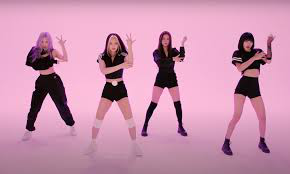

In [5]:
display(Image.fromarray(im[:, :, ::-1]))

In [6]:
outputs = predictor(im)

/opt/conda/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  filter_inds = filter_mask.nonzero()


In [7]:
type(outputs)

dict

In [8]:
outputs.keys()

dict_keys(['instances'])

In [9]:
ins = outputs['instances']
type(ins)

detectron2.structures.instances.Instances

In [10]:
ins.image_size

(174, 290)

In [11]:
ins.pred_keypoints.shape, ins.pred_keypoint_heatmaps.shape

(torch.Size([4, 17, 3]), torch.Size([4, 17, 56, 56]))

In [12]:
type(ins.get_fields())

dict

In [13]:
ins.get_fields().keys()

dict_keys(['pred_boxes', 'scores', 'pred_classes', 'pred_keypoints', 'pred_keypoint_heatmaps'])

In [17]:
for k in ins.get_fields():
    print(k, type(ins.get_fields()[k]))

pred_boxes <class 'detectron2.structures.boxes.Boxes'>
scores <class 'torch.Tensor'>
pred_classes <class 'torch.Tensor'>
pred_keypoints <class 'torch.Tensor'>
pred_keypoint_heatmaps <class 'torch.Tensor'>


In [18]:
boxes = ins.get('pred_boxes')
boxes

Boxes(tensor([[141.5193,  31.4868, 189.2057, 135.6350],
        [221.4248,  35.1949, 271.2917, 155.6825],
        [ 24.6002,  33.6245,  76.1510, 133.8416],
        [ 94.5497,  33.5201, 133.6174, 146.7651]], device='cuda:0'))

In [19]:
boxes.tensor.shape

torch.Size([4, 4])

In [20]:
kps = ins.get('pred_keypoints')
kps.shape

torch.Size([4, 17, 3])

In [21]:
kps[0][:,:2]

tensor([[166.1212,  41.1623],
        [167.8552,  39.4229],
        [164.3871,  39.2055],
        [170.4563,  40.9449],
        [161.1357,  40.7275],
        [174.1412,  52.0337],
        [156.8006,  52.2512],
        [182.1612,  57.6869],
        [159.4017,  63.3400],
        [182.8114,  44.8586],
        [172.4071,  59.2089],
        [172.8406,  81.3866],
        [160.0520,  81.6040],
        [178.2595, 104.2166],
        [154.1995, 103.9991],
        [180.4271, 126.8291],
        [145.0957, 126.8291]], device='cuda:0')

In [22]:
kps[0][:,2]

tensor([1.3167, 1.2455, 1.1756, 0.7465, 0.7708, 0.2638, 0.2661, 0.1789, 0.1543,
        0.2621, 0.0900, 0.1094, 0.1184, 0.3135, 0.3778, 0.3129, 0.2466],
       device='cuda:0')

In [23]:
ins.get('scores')

tensor([0.9998, 0.9997, 0.9990, 0.9911], device='cuda:0')

## Get Meta

In [24]:
meta = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
meta

Metadata(evaluator_type='coco', image_root='datasets/coco/train2017', json_file='datasets/coco/annotations/person_keypoints_train2017.json', keypoint_connection_rules=[('left_ear', 'left_eye', (102, 204, 255)), ('right_ear', 'right_eye', (51, 153, 255)), ('left_eye', 'nose', (102, 0, 204)), ('nose', 'right_eye', (51, 102, 255)), ('left_shoulder', 'right_shoulder', (255, 128, 0)), ('left_shoulder', 'left_elbow', (153, 255, 204)), ('right_shoulder', 'right_elbow', (128, 229, 255)), ('left_elbow', 'left_wrist', (153, 255, 153)), ('right_elbow', 'right_wrist', (102, 255, 224)), ('left_hip', 'right_hip', (255, 102, 0)), ('left_hip', 'left_knee', (255, 255, 77)), ('right_hip', 'right_knee', (153, 255, 204)), ('left_knee', 'left_ankle', (191, 255, 128)), ('right_knee', 'right_ankle', (255, 195, 77))], keypoint_flip_map=(('left_eye', 'right_eye'), ('left_ear', 'right_ear'), ('left_shoulder', 'right_shoulder'), ('left_elbow', 'right_elbow'), ('left_wrist', 'right_wrist'), ('left_hip', 'right_hi

In [25]:
len(meta.keypoint_names), meta.keypoint_names

(17,
 ('nose',
  'left_eye',
  'right_eye',
  'left_ear',
  'right_ear',
  'left_shoulder',
  'right_shoulder',
  'left_elbow',
  'right_elbow',
  'left_wrist',
  'right_wrist',
  'left_hip',
  'right_hip',
  'left_knee',
  'right_knee',
  'left_ankle',
  'right_ankle'))

In [26]:
meta.keypoint_connection_rules

[('left_ear', 'left_eye', (102, 204, 255)),
 ('right_ear', 'right_eye', (51, 153, 255)),
 ('left_eye', 'nose', (102, 0, 204)),
 ('nose', 'right_eye', (51, 102, 255)),
 ('left_shoulder', 'right_shoulder', (255, 128, 0)),
 ('left_shoulder', 'left_elbow', (153, 255, 204)),
 ('right_shoulder', 'right_elbow', (128, 229, 255)),
 ('left_elbow', 'left_wrist', (153, 255, 153)),
 ('right_elbow', 'right_wrist', (102, 255, 224)),
 ('left_hip', 'right_hip', (255, 102, 0)),
 ('left_hip', 'left_knee', (255, 255, 77)),
 ('right_hip', 'right_knee', (153, 255, 204)),
 ('left_knee', 'left_ankle', (191, 255, 128)),
 ('right_knee', 'right_ankle', (255, 195, 77))]

## Visualization

In [27]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], meta, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [35]:
im_vis = out.get_image()[:, :, ::-1]

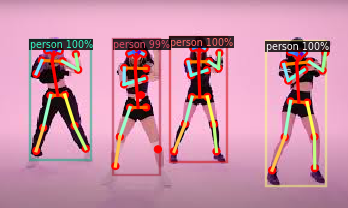

In [36]:
display(Image.fromarray(im_vis[:, :, ::-1]))

In [37]:
cv2.imwrite('demo/dance_out.png', im_vis)

True